## **Dataset Characteristics**

In this Jupyter notebook, we explain the analyzed the given dataset regarding missing values, their impact and the evaluation of the entire dataset including added features.

### **0 - Import the file**

In [ ]:
# Import the necessary libaries
import csv
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
import missingno as msno

# Read the file and check it out
# df = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/8-homework_week08/cleaned_data/1_merged_data.csv')

# Correct URL
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/1_merged_data.csv'

# Read the file and check it out
df = pd.read_csv(url)
df.info()
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10119 entries, 0 to 10118
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                10119 non-null  object 
 1   Bewoelkung           10048 non-null  float64
 2   Temperatur           10103 non-null  float64
 3   Windgeschwindigkeit  10103 non-null  float64
 4   Wettercode           7581 non-null   float64
 5   KielerWoche          250 non-null    float64
 6   Warengruppe          9334 non-null   float64
 7   Umsatz               9334 non-null   float64
dtypes: float64(7), object(1)
memory usage: 632.6+ KB
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2012-01-01         8.0      9.8250                 14.0        58.0   
1  2012-01-02         7.0      7.4375                 12.0         NaN   
2  2012-01-03         8.0      5.5375                 18.0        63.0   
3  2012-01-04         4.0      5.6875     

In [ ]:
# Check Bewoelkung

Bewoelkung_unique = df.Bewoelkung.unique()
np.sort(Bewoelkung_unique)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan])

### **1 - Detect missing values in merged dataset (kiwo.csv, umsatzdaten.csv, wetter.csv)**

In [ ]:
# Detect missing values (NaN) in merged dataset

url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/1_merged_data.csv'

# Read the file and check it out
df = pd.read_csv(url, na_values='.')
print(df.head(10))


        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2012-01-01         8.0    9.825000                 14.0        58.0   
1  2012-01-02         7.0    7.437500                 12.0         NaN   
2  2012-01-03         8.0    5.537500                 18.0        63.0   
3  2012-01-04         4.0    5.687500                 19.0        80.0   
4  2012-01-05         6.0    5.300000                 23.0        80.0   
5  2012-01-06         3.0    2.625000                 10.0         NaN   
6  2012-01-07         7.0    6.528571                 14.0        61.0   
7  2012-01-08         7.0    5.962500                 10.0        80.0   
8  2012-01-09         8.0    5.150000                 12.0        61.0   
9  2012-01-10         6.0    6.112500                 10.0         NaN   

   KielerWoche  Warengruppe  Umsatz  
0          NaN          NaN     NaN  
1          NaN          NaN     NaN  
2          NaN          NaN     NaN  
3          NaN          NaN     N

#### **1.1 - Total missing values in merged dataset (kiwo.csv, umsatzdaten.csv, wetter.csv)**

In [ ]:
df_nullity = df.isnull()
df_nullity.sum()

Datum                     0
Bewoelkung               71
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2538
KielerWoche            9869
Warengruppe             785
Umsatz                  785
dtype: int64

#### **1.2 - Percentage of missingness in merged dataset (kiwo.csv, umsatzdaten.csv, wetter.csv)**

In [ ]:
df_nullity.mean() * 100

Datum                   0.000000
Bewoelkung              0.701650
Temperatur              0.158118
Windgeschwindigkeit     0.158118
Wettercode             25.081530
KielerWoche            97.529400
Warengruppe             7.757684
Umsatz                  7.757684
dtype: float64

#### **1.3 - Graphical analysis of missing values in merged dataset (kiwo.csv, umsatzdaten.csv, wetter.csv)**

<Axes: >

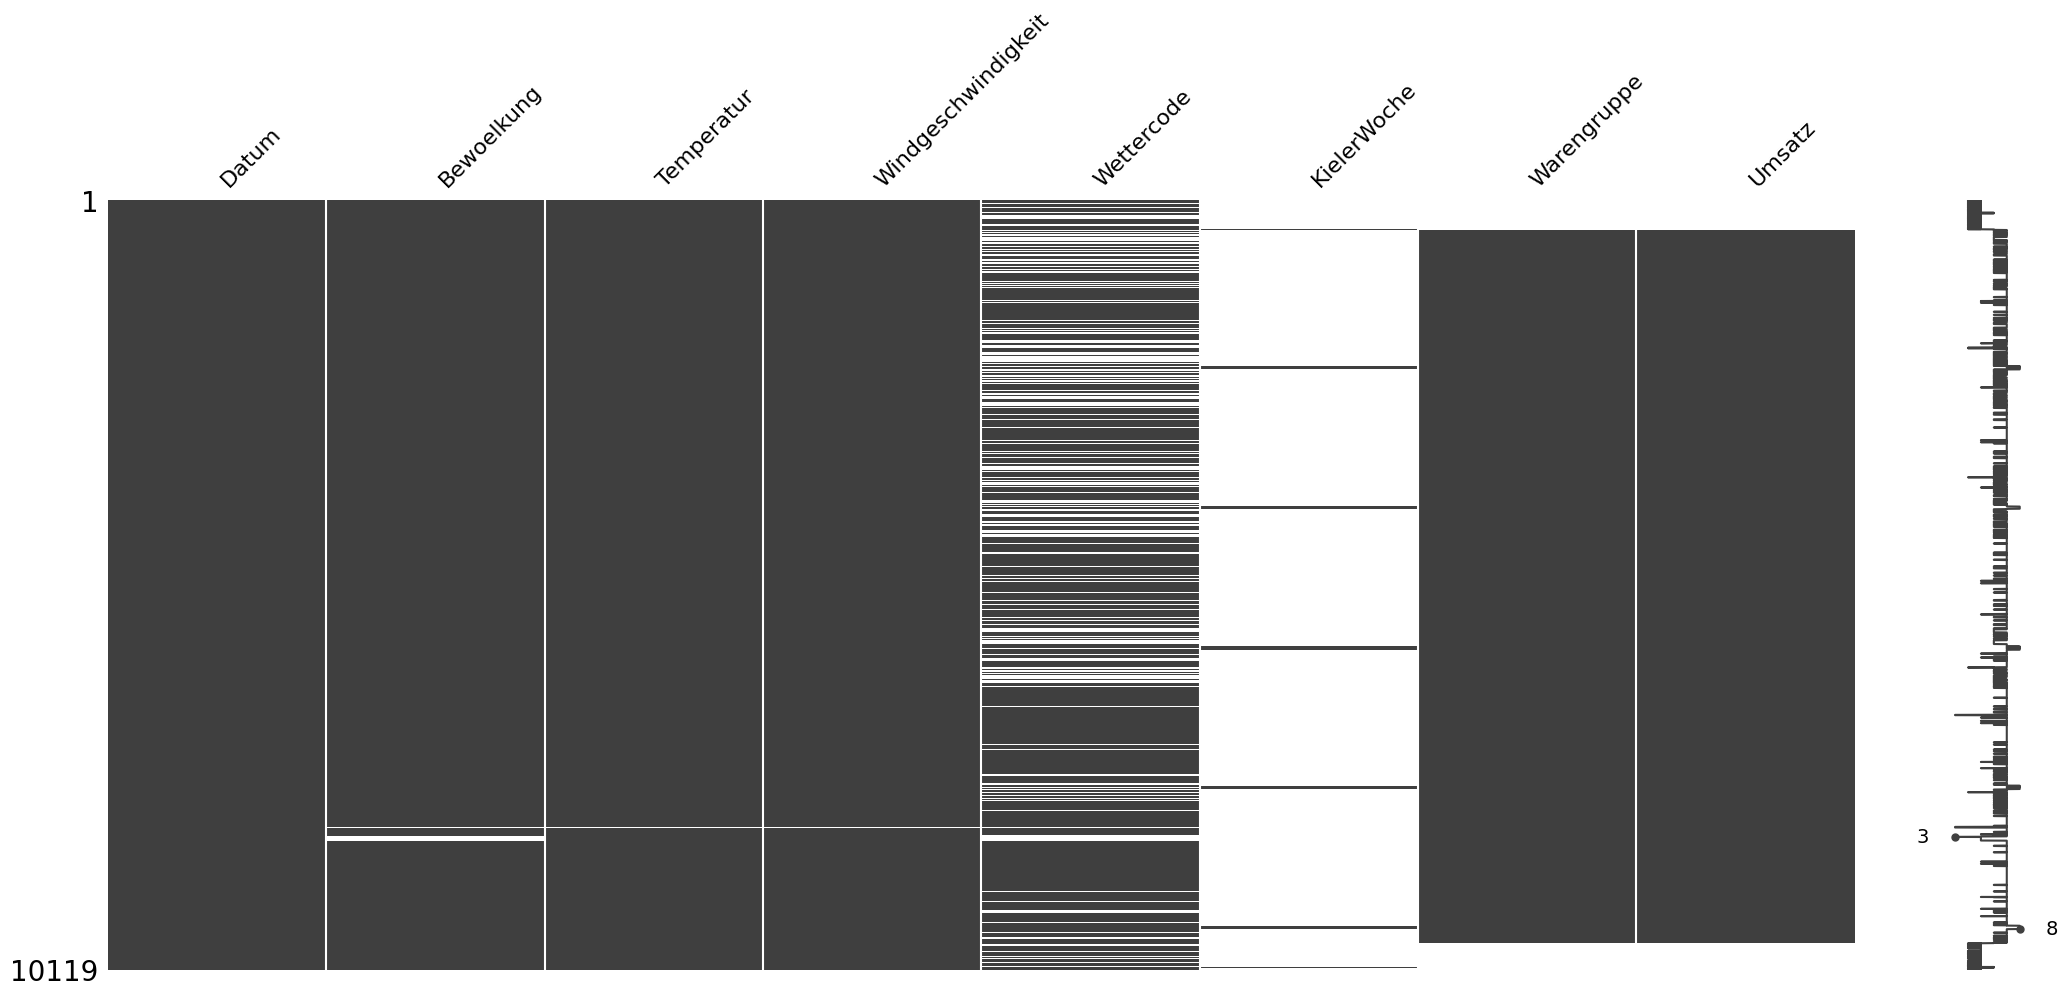

In [ ]:
msno.matrix(df)

**Resume**



1. *Bewoelkung*: The pattern suggests it might be **MAR** or MNAR, depending on whether its missingness can be related to other observed variables or itself.
2. *Temperatur*: The missingness seems somewhat random but might be **MAR** if related to other weather variables.
3. *Windgeschwindigkeit*:  Similar to Temperatur, it could be **MAR** if missingness correlates with other weather-related data.
4. *Wettercode*: The large number of missing values suggests it could be MAR, related to other weather data, or **MNAR** if it is dependent on specific unobserved conditions.
5. *KielerWoche*: The missing values follow a pattern, which suggests **MNAR**.
6. *Warengruppe*: There is no missing data for overall group *Warengruppe*.
7. *Umsatz*: There is no missing data for overall group *Umsatz.  

**Please note**: The missing data for *Umsatz* und *Warengruppe* suggests that there was simply no data and therefore, we come to the conclusion that these dates are not of interest for our survey.









#### **1.4 Missingness Heatmap and Dendogram**

<Axes: >

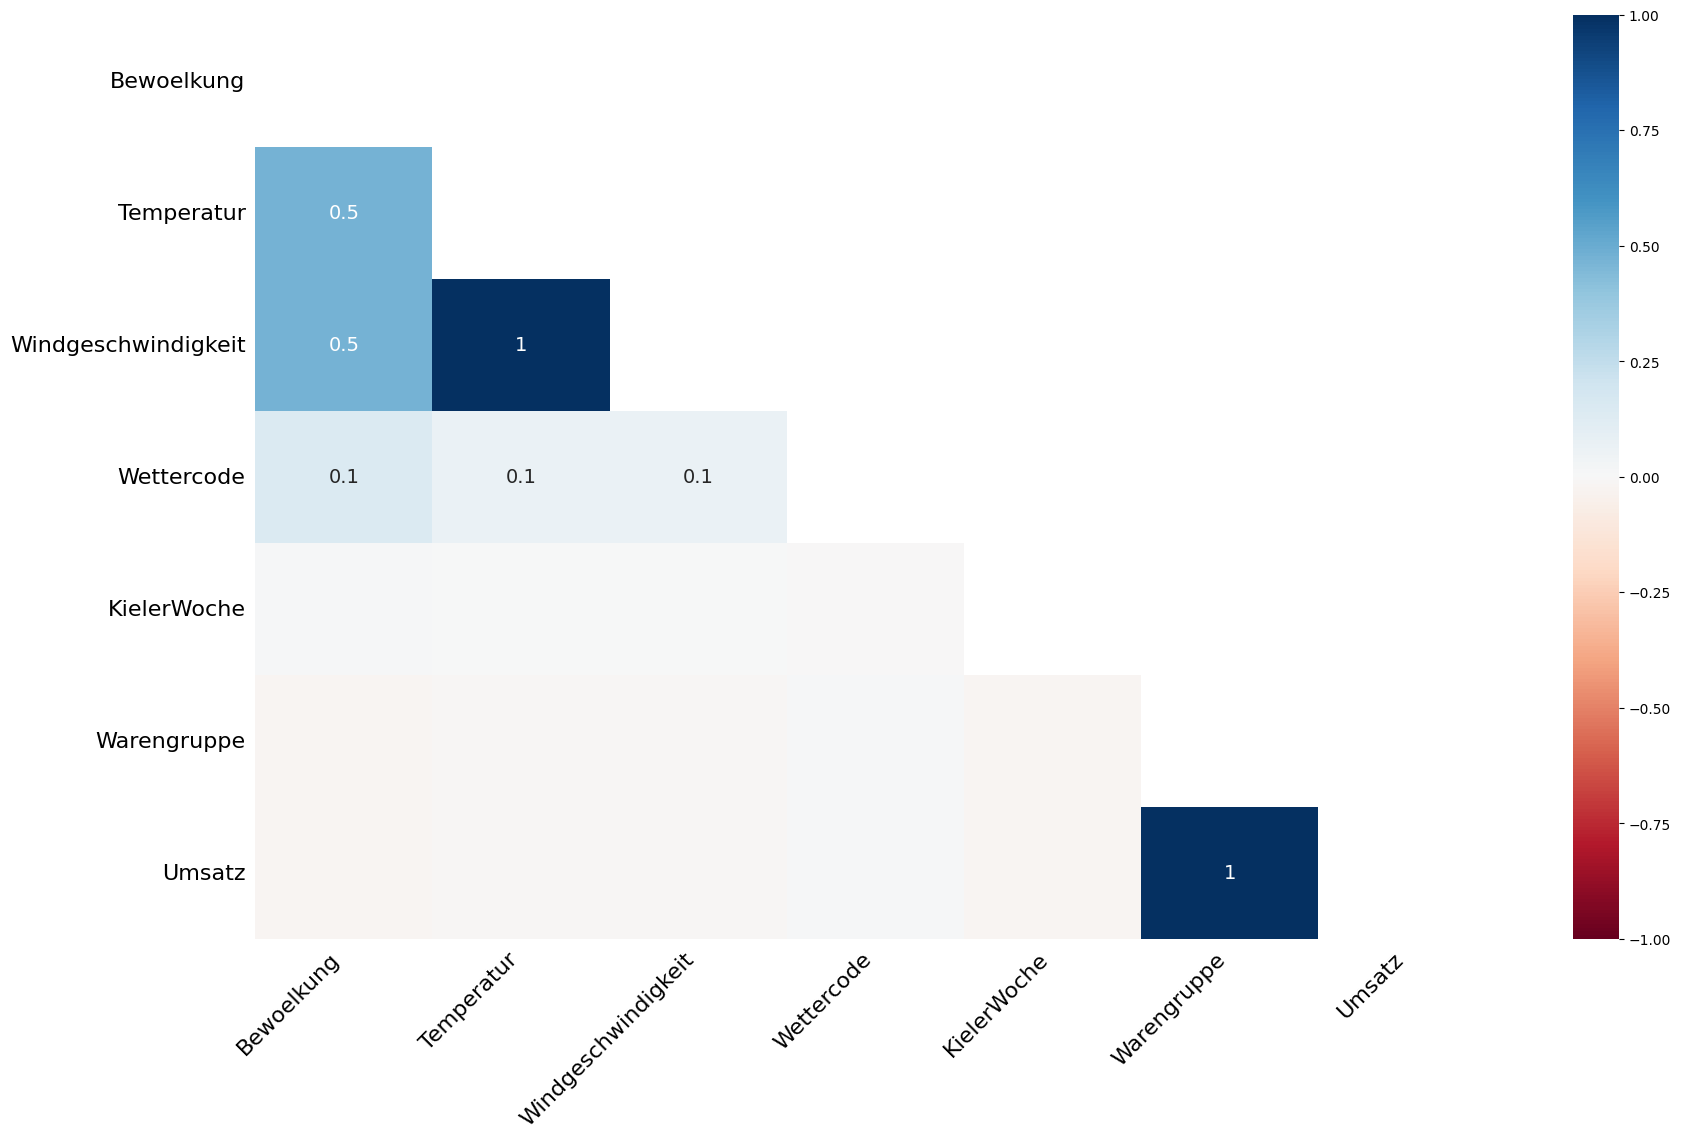

In [ ]:
msno.heatmap(df)

<Axes: >

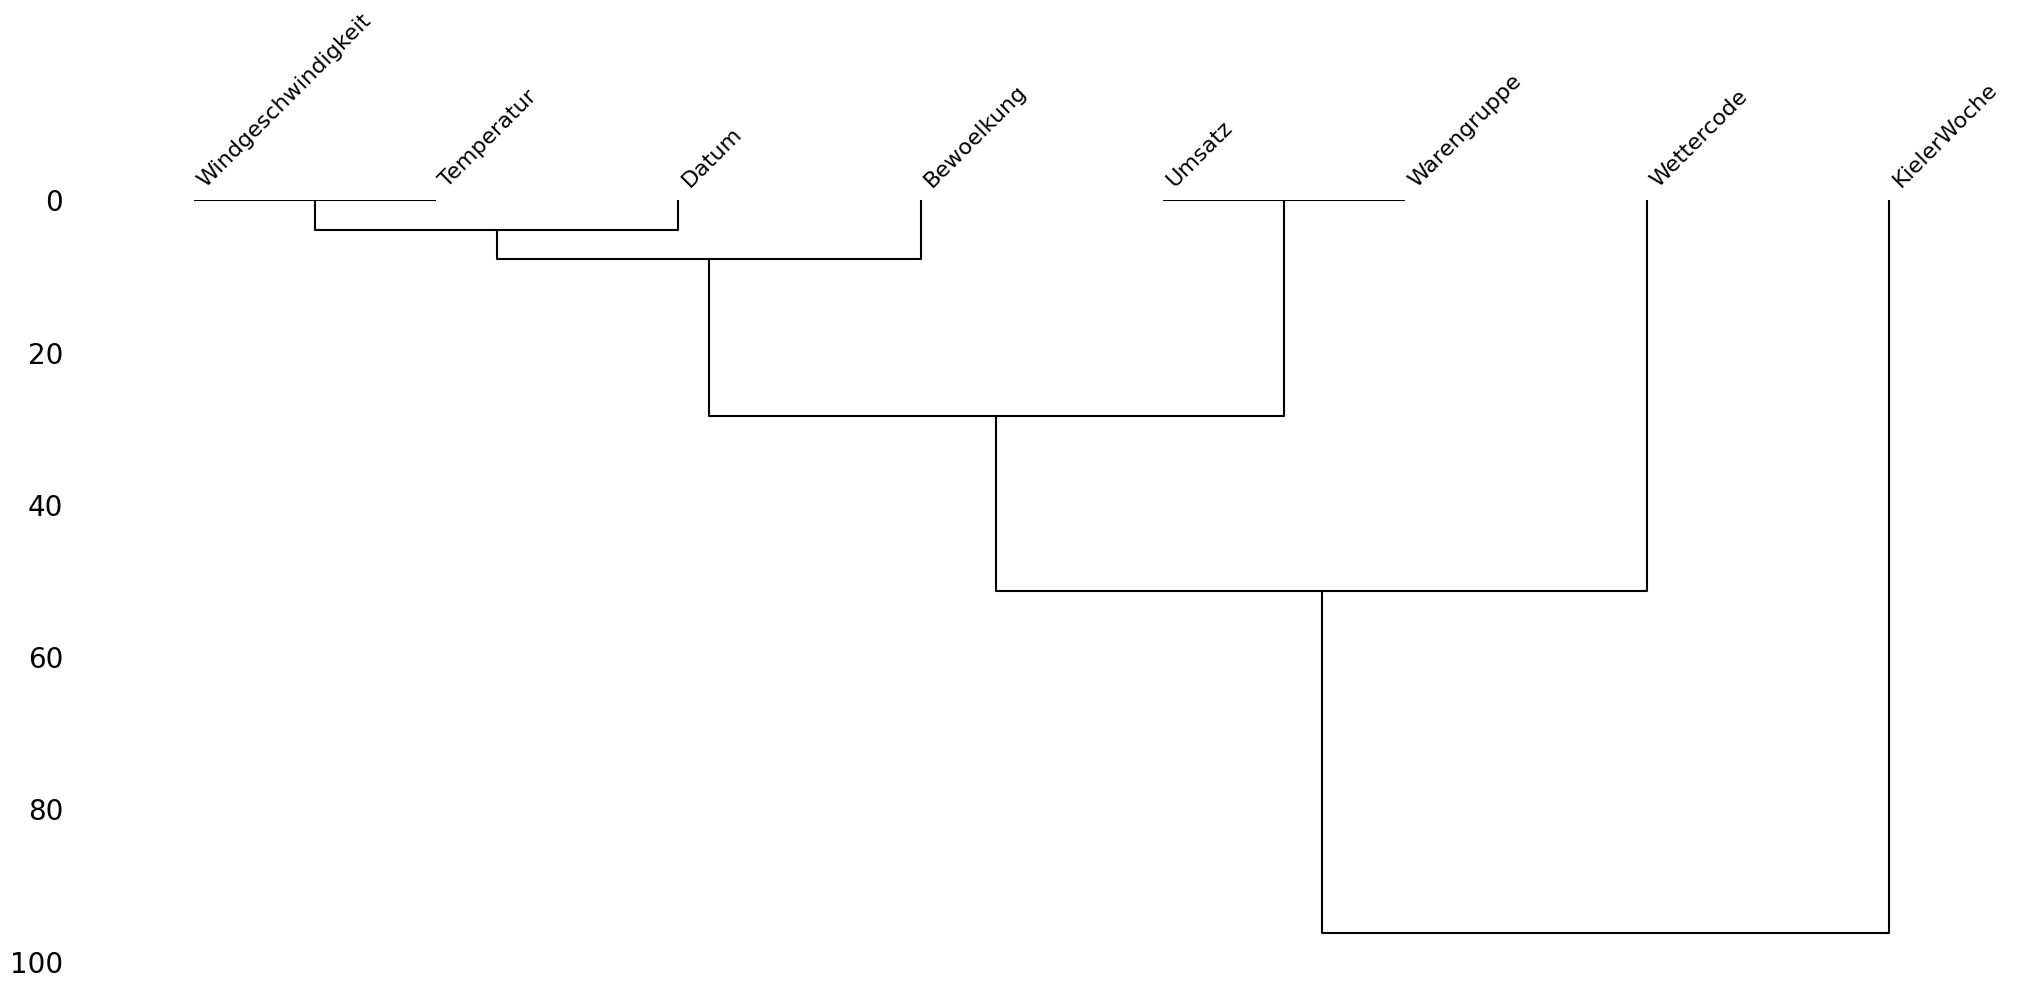

In [ ]:
msno.dendrogram(df)

**Resume**
1. *Bewoelkung* shows a moderate correlation (0.5) with missing values in *Temperatur* and a moderate correlation (0.5) with missing values in *Windgeschwindigkeit*.
2. *Temperatur* shows a perfect positive correlation(1) with missing values in *Windgeschwindigkeit* and a weak correlation (0.1) with missing values in *Weathercode*.
3. *Windgeschwindigkeit* shows a weak correlation (0.1) with missing values in *Weathercode*.
4. *Wettercode* shows a weak correlation (0.1) with missing values in both *Temperatur* and *Windgeschwindigkeit*.
5. *KielerWoche* appears to have little to no significant correlation with other columns based on missing values.
6. *Warengruppe*: This group will be inspected seperately at a later stage.
7. *Umsatz*: This group will be inspected seperately at a later stage.

### 2 - Detect missing values in *Warengruppe* (umsatzdaten.csv)

In [ ]:
# Import additional files for detection

# Read the file and check it out
# df = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/8-homework_week08/cleaned_data/1_merged_data.csv')

# Correct URL
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/umsatzdaten.csv'

# Read the file and check it out
df_umsatz = pd.read_csv(url)
df_umsatz.info()
print(df_umsatz.head())
print(df_umsatz.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datum        9334 non-null   object 
 1   Warengruppe  9334 non-null   int64  
 2   Umsatz       9334 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 218.9+ KB
        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
           Datum  Warengruppe     Umsatz
9329  2017-12-21            6  87.471228
9330  2017-12-22            6  71.911652
9331  2017-12-23            6  84.062223
9332  2017-12-24            6  60.981969
9333  2017-12-27            6  34.972644


#### **2.1 - Total missing values in dataset (umsatzdaten.csv)**

In [ ]:
df_umsatz_nullity = df_umsatz.isnull()
df_umsatz_nullity.sum()

Datum          0
Warengruppe    0
Umsatz         0
dtype: int64

**There is no missing data as we used only *Umsatzdaten* !!**